## Pandas time series
A series or dataframe using a datetime index instead of a range index.

Used for storing events/data that fits on a timeline.
- Weather data
- Temperature readings.
- Heart rate monitoring (ECG)
- Quarterly sales.
- Stock prices.

Manual: https://pandas.pydata.org/docs/user_guide/timeseries.html

In [1]:
import pandas as pd
import numpy as np

### Creating a datetimeindex
Use date_range() with 3 of the 4 parameters:
- start
- end
- periods
- freq

In [4]:
datetimeindex = pd.date_range(start='2018-01-01', end='2018-02-10', periods=10)
datetimeindex

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-05 10:40:00',
               '2018-01-09 21:20:00', '2018-01-14 08:00:00',
               '2018-01-18 18:40:00', '2018-01-23 05:20:00',
               '2018-01-27 16:00:00', '2018-02-01 02:40:00',
               '2018-02-05 13:20:00', '2018-02-10 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [7]:
# freq='d' is the same as freq='D', and it returns all days in the range
datetimeindex = pd.date_range(start='2018-01-01', end='2018-02-10', freq='2d5h30min10s')
datetimeindex

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-03 05:30:10',
               '2018-01-05 11:00:20', '2018-01-07 16:30:30',
               '2018-01-09 22:00:40', '2018-01-12 03:30:50',
               '2018-01-14 09:01:00', '2018-01-16 14:31:10',
               '2018-01-18 20:01:20', '2018-01-21 01:31:30',
               '2018-01-23 07:01:40', '2018-01-25 12:31:50',
               '2018-01-27 18:02:00', '2018-01-29 23:32:10',
               '2018-02-01 05:02:20', '2018-02-03 10:32:30',
               '2018-02-05 16:02:40', '2018-02-07 21:32:50'],
              dtype='datetime64[ns]', freq='192610S')

In [18]:
datetimeindex = pd.date_range(start='2018-01-01', end='2019-12-31', freq='D')
datetimeindex

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=730, freq='D')

In [19]:
df = pd.DataFrame(
    dict(
        n = range(len(datetimeindex)),
        rand = np.random.random(len(datetimeindex)),
    ),
    # For the below date examples to work, the index must be specified as datetimeindex
    index = datetimeindex
)
df

,n,rand
2018-01-01,0,0.927897
2018-01-02,1,0.657771
2018-01-03,2,0.084520
2018-01-04,3,0.936560
2018-01-05,4,0.511680
...,...,...
2019-12-27,725,0.280179
2019-12-28,726,0.158049
2019-12-29,727,0.547244
2019-12-30,728,0.985556


In [23]:
df.loc["2018-03-15"]
# Slice up until that date
df.loc[:"2018-03-15", "rand"]
# Slice between dates
df.loc["2018-03-15":"2018-03-20", "rand"]
# Get year
df.loc["2019"]

,n,rand
2019-01-01,365,0.940735
2019-01-02,366,0.404448
2019-01-03,367,0.230711
2019-01-04,368,0.104037
2019-01-05,369,0.252852
...,...,...
2019-12-27,725,0.280179
2019-12-28,726,0.158049
2019-12-29,727,0.547244
2019-12-30,728,0.985556


### Resampling
Resampling is the practice of creating new samples with a lower or higher frequency than the original data. 

#### Downsampling
When the sample frequency is lower than the original, we can aggregate values from the original data.

In [30]:
from helpers import hdisplay

resample_method = "2D"

hdisplay([
    df.head(10),
    df.resample(resample_method).agg({"n": "max", "rand": "sum"}).head(10)],
    ["Original", f"Resampled using '{resample_method}'"]
)

,n,rand
2018-01-01 00:00:00,0,0.927897
2018-01-02 00:00:00,1,0.657771
2018-01-03 00:00:00,2,0.084520
2018-01-04 00:00:00,3,0.936560
2018-01-05 00:00:00,4,0.511680
2018-01-06 00:00:00,5,0.726703
2018-01-07 00:00:00,6,0.465008
2018-01-08 00:00:00,7,0.553976
2018-01-09 00:00:00,8,0.157382
2018-01-10 00:00:00,9,0.344371


#### Upsampling
When the sample frequency is higher than the original, we can extrapolate values from the original data.

- ffill 
- bfill
- nearest
- interpolation
- fillna

In [35]:
resample_method = "6H"

hdisplay([
    df.head(10),
    df.resample(resample_method).nearest().head(10)],
    ["Original", f"Resampled using '{resample_method}'"]
)

,n,rand
2018-01-01 00:00:00,0,0.927897
2018-01-02 00:00:00,1,0.657771
2018-01-03 00:00:00,2,0.084520
2018-01-04 00:00:00,3,0.936560
2018-01-05 00:00:00,4,0.511680
2018-01-06 00:00:00,5,0.726703
2018-01-07 00:00:00,6,0.465008
2018-01-08 00:00:00,7,0.553976
2018-01-09 00:00:00,8,0.157382
2018-01-10 00:00:00,9,0.344371


## Working on real data

In [52]:
apple = pd.read_csv("../Data/HistoricalData_Apple.csv", parse_dates=["Date"], index_col="Date")
apple.rename(columns={"Close/Last": "Close"}, inplace=True)
apple.head()

,Close,Volume,Open,High,Low
Date,,,,,
2023-11-09,$182.41,53763540,$182.96,$184.12,$181.81
2023-11-08,$182.89,49340280,$182.35,$183.45,$181.59
2023-11-07,$181.82,70529970,$179.18,$182.44,$178.97
2023-11-06,$179.23,63841310,$176.38,$179.43,$176.21
2023-11-03,$176.65,79829250,$174.24,$176.82,$173.35


In [53]:
apple[["Close","Open","High","Low"]] = apple[["Close","Open","High","Low"]].map(lambda value: value.replace("$","")).astype(float) #replace("[\$,]", "", regex=True).astype(float)
apple.head()

,Close,Volume,Open,High,Low
Date,,,,,
2023-11-09,182.41,53763540,182.96,184.12,181.81
2023-11-08,182.89,49340280,182.35,183.45,181.59
2023-11-07,181.82,70529970,179.18,182.44,178.97
2023-11-06,179.23,63841310,176.38,179.43,176.21
2023-11-03,176.65,79829250,174.24,176.82,173.35


In [54]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2023-11-09 to 2013-11-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2517 non-null   float64
 1   Volume  2517 non-null   int64  
 2   Open    2517 non-null   float64
 3   High    2517 non-null   float64
 4   Low     2517 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


In [58]:
apple.sort_index(inplace=True)
apple

,Close,Volume,Open,High,Low
Date,,,,,
2013-11-11,18.5374,226990197,18.5711,18.6311,18.3718
2013-11-12,18.5718,204271118,18.4882,18.7114,18.4643
2013-11-13,18.5941,196615949,18.5000,18.6518,18.4629
2013-11-14,18.8629,281606247,18.6718,18.9029,18.6382
2013-11-15,18.7497,317359713,18.8064,18.8961,18.7318
...,...,...,...,...,...
2023-11-03,176.6500,79829250,174.2400,176.8200,173.3500
2023-11-06,179.2300,63841310,176.3800,179.4300,176.2100
2023-11-07,181.8200,70529970,179.1800,182.4400,178.9700


In [66]:
# pd.set_option("display.float_format", '{:.3f}'.format)
pd.set_eng_float_format(accuracy=2, use_eng_prefix=True)

# Maximum value of the High column in 2018
apple.loc["2018","High"].max()

apple.loc["2018","Close"].mean()

# Average opening price per year 
apple.resample("YS").mean()

,Close,Volume,Open,High,Low
Date,,,,,
2013-01-01,19.51,305.95M,19.50,19.65,19.38
2014-01-01,23.07,251.68M,23.05,23.25,22.87
2015-01-01,30.01,206.59M,30.04,30.31,29.72
2016-01-01,26.15,153.07M,26.13,26.36,25.92
2017-01-01,37.64,108.01M,37.61,37.85,37.37
2018-01-01,47.26,135.07M,47.28,47.75,46.80
2019-01-01,52.06,112.24M,51.97,52.46,51.57
2020-01-01,95.35,157.62M,95.27,96.66,93.91
2021-01-01,140.99,90.54M,140.86,142.35,139.47


<Axes: xlabel='Date', ylabel='Open'>

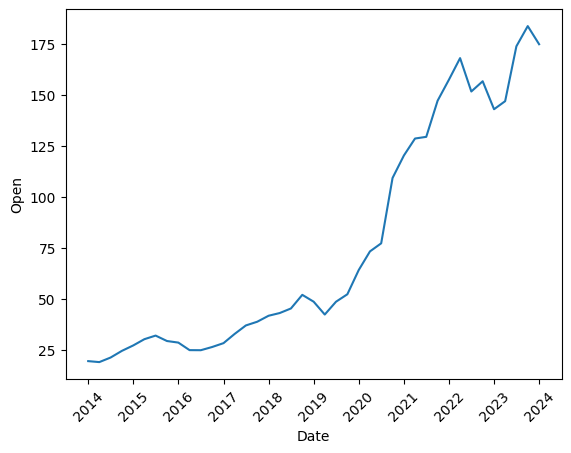

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

data = apple.loc["2020-10"]
data = apple.loc["2020"]
data = apple.loc["2020"].resample("W").mean()
data = apple.resample("Q").mean()
plt.xticks(rotation=45)
sns.lineplot(data=data, x=data.index, y="Open")